### 캐글즐기기 파트4 * Bayesian Statistics: Techniques and Models

### link : https://www.coursera.org/learn/mcmc-bayesian-statistics
### (베이지안) Week2. Markov chain Monte Carlo (MCMC) - 이상열

### Ref1 : http://datum.io/tag/%EB%A9%94%ED%8A%B8%EB%A1%9C%ED%8F%B4%EB%A6%AC%EC%8A%A4-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/

### Ref2 : http://freesearch.pe.kr/archives/3877

### Module Overview
#### 4. Metropolis-Hastings
    - Algorithm
    - Demonstration
    - Random walk example, Part 1
    - Random walk example, Part 2
    - Quiz: Lesson 4
    - Code for Lesson 4

#### JAGS
    - Download, install, setup3 min
    - Model writing, running, and post-processing
    - Alternative MCMC software10 min
    - Code from JAGS introduction

#### 5. Gibbs Sampling
    - Multiple parameter sampling and full conditional distributions8 min
    - Conditionally conjugate prior example with Normal likelihood10 min
    - Computing example with Normal likelihood16 min
    - Quiz: Lesson 5
    - Code for Lesson 5

#### 6. Assessing Convergence
    - Trace plots, autocorrelation
    - Autocorrelation
    - Multiple chains, burn-in, Gelman-Rubin diagnostic
    - Quiz: Lesson 6
    - Code for Lesson 6

#### Learning Objectives
- Understand the basics of MCMC including Metropolis-Hastings and Gibbs sampling.
- Write a statistical model in JAGS and produce posterior samples by calling JAGS from R.
- Assess MCMC output to determine if it is suitable for inference.



#### Algorithm

- Metropolis-Hastings은 일반 확률 분포에서 샘플을 추출 할 수있는 알고리즘입니다. 정규 분포를 모르는 경우에도 목표 분포라고 부릅니다. 우리는 찾고있는 목표 분포가 고정 분포 인 마르코프 체인을 구성하고 샘플링합니다.

- 임의의 시작 값을 선택하고 샘플링하기 쉬운 다른 분포에서 가져온 후보 샘플을 반복적으로 수락하거나 거부하는 것으로 구성됩니다.


![](img/week2_1.png)

- 첫 번째 단계는 theta의 초기 값을 선택하는 것입니다.
- 두 번째 단계는 많은 수의 반복에 대한 것이므로 1에서부터 큰 m까지 우리는 다음을 반복 할 것입니다.
    - 우리가 할 첫 번째 일은 후보자를 찾는 것입니다.
    - 우리는 그 세타 스타를 우리 후보로 부를 것입니다. 그리고 우리는 이것을 제안 배포판에서 끌어낼 것입니다.
    - 우리는 이전 반복의 세타 값이 주어지면 theta-star의 제안 배포 q를 호출 할 것입니다. 우리는 곧이 q 배포에 대해 더 많은 것을 알게 될 것입니다.
    - 다음 단계는 다음 비율을 계산하는 것입니다. 우리는 이것을 알파라고 부를 것입니다.
    - 후보로 평가 된이 g 함수는 이전 반복이 주어진 후보에서 평가 된 분포 또는 밀도 q로 나눈 값입니다.
    - 그리고 이 모든 것은 이전 반복에서 평가 된 g로 나뉩니다.
    - 다음 단계는 일단 알파를 계산하면 알파를 확인하는 것입니다.
    - 1보다 크거나 같으면 후보를 수락(다음 분포로 정함) 할 것입니다.
    - 그래서 우리는 후보 세타 스타를 받아들이고, 우리의 현재 세타 반복을 설정합니다.
    - 제안 된 후보자로의 이동이 유리한 경우, 즉 알파가 1보다 큰 경우 해당 항목으로 이동할 것입니다. 유리하지 않다면 우리는 여전히 그곳으로 이동할 것입니다.
    - 후보자로 옮기기로 한 우리의 결정은 현재 사슬이 어디에 있는지에 달려 있기 때문에 이것은 마르코프 사슬입니다. 하나의 신중한 선택은 후보가 배포 q를 생성하는 것입니다.

- 또 다른 인기있는 옵션, 이전 반복에 의존하는 것은 랜덤 워크 Metropolis-Hastings라고합니다. 여기서 제안 배포는 이전 반복을 중심으로 이루어집니다. 예를 들어, 평균이 우리의 이전 반복 theta i에서 1을 뺀 정규 분포 일 수 있습니다. 정규 분포가 평균을 중심으로 대칭이기 때문에이 예제는 또 다른 장점이 있습니다.

- 우리가 앞으로의 예에서 보게 될 것처럼, 랜덤 워크 메트로폴리스 - 헤이스팅스 샘플러에 대한 높은 합격률은 좋지 않습니다. 무작위 도보가 너무 적은 단계를 거치는 경우 후보자를 수락하지만 흔히 사후 분포를 완전히 탐색하는 데 시간이 오래 걸릴 것입니다.

In [1]:
library(ggplot2)
set.seed(1234)

In [2]:
N <- 10000
x <- vector(N, mode = "numeric")
x[1] <- rnorm(1, mean = 0, sd = 2)
for (i in 1:(N - 1)) {
    x[i + 1] <- x[i] + rnorm(1, mean = 0, sd = 2)
}

In [5]:
length(x)

[1] 10000

In [20]:
x[1:100]

[1]  -2.4141315  -1.8592730   0.3096093  -4.3817861  -3.5235367  -2.5114249
  [7]  -3.6609048  -4.7541685  -5.8830725  -7.6631482  -8.6175336 -10.6143065
 [13] -12.1668143 -12.0378966 -10.1189085 -10.3394795 -11.3614985 -13.1838894
 [19] -14.8582327 -10.0265624  -9.7583859 -10.7397577 -11.6208535 -10.7016746
 [25] -12.0891151 -14.9855249 -13.8360134 -15.8833249 -15.9136015 -17.7854987
 [31] -15.5809036 -16.5320898 -17.9509698 -18.9534860 -22.2116729 -24.5469114
 [37] -28.9069907 -31.5889771 -32.1775648 -33.1093599 -30.2103674 -32.3476528
 [43] -34.0583821 -34.6196281 -36.6083082 -38.5453369 -40.7599733 -43.2639450
 [49] -44.3116013 -45.3053012 -48.9173637 -50.0815155 -52.2992948 -54.3292188
 [55] -54.6538379 -53.5277262 -50.2320913 -51.7787981 -48.5669789 -50.8825960
 [61] -49.5694190 -44.4714369 -44.5409577 -45.8802248 -45.8954343 -42.3412654
 [67] -44.6184809 -41.8828266 -39.2236970 -38.5507514 -38.5369657 -39.4479032
 [73] -40.1809511 -38.8843779 -34.7438362 -35.0506330 -37.8320349 -39.2791985
 [79] -38.7626749 -39.3967932 -39.7523731 -40.0923612 -42.8369650 -43.1845394
 [85] -41.4840748 -40.0888574 -38.9888627 -39.7943267 -40.1775142 -42.5665700
 [91] -42.6728876 -42.1624956 -38.7505676 -36.7475411 -37.7387080 -37.0276074
 [97] -39.2968235 -37.5404162 -35.5945827 -31.3523485

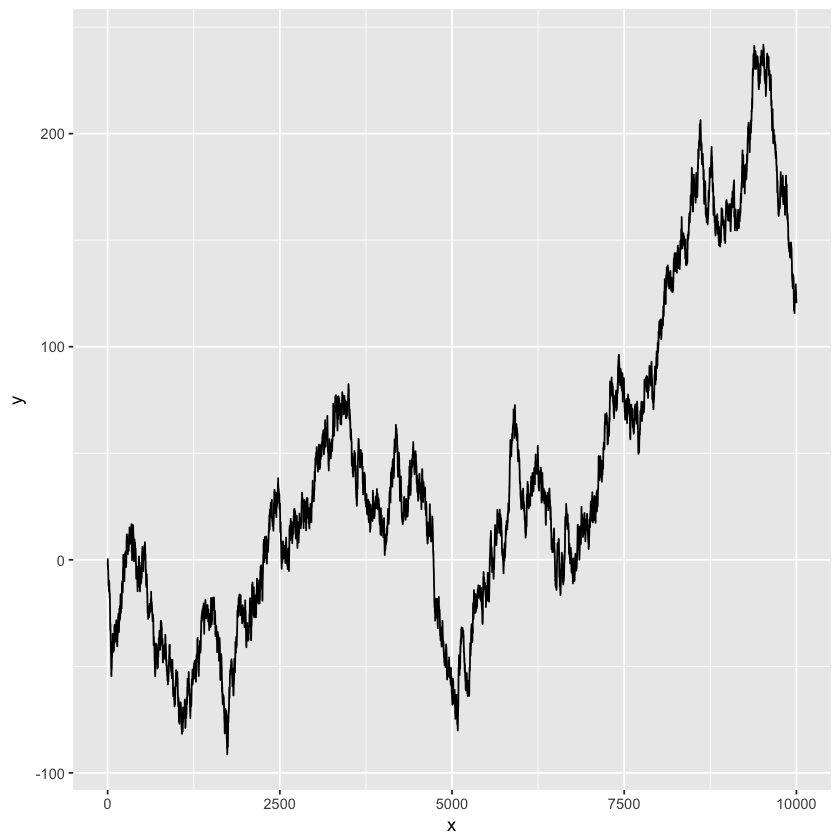

In [7]:
ggplot(data.frame(x = 1:N, y = x), aes(x, y)) + geom_line()

In [8]:
p <- function(x) {
    mu1 <- 3
    mu2 <- 10
    v1 <- 10
    v2 <- 3
    0.3 * exp(-(x - mu1)^2/v1) + 0.7 * exp(-(x - mu2)^2/v2)
}

In [9]:
mh <- function(N) {
    u <- runif(N)
    mu <- 0
    sigma <- 5
    y <- vector(N, mode = "numeric")
    y[1] <- rnorm(1, mean = mu, sd = sigma)
    for (i in 1:N) {
        # 마르코프 체인
        ynew <- y[i] + rnorm(1, mean = mu, sd = sigma)
        alpha <- min(1, p(ynew)/p(y[i]))
        if (u[i] < alpha) {
            y[i + 1] <- ynew
        } else {
            y[i + 1] <- y[i]
        }
    }
    return(y)
}

In [10]:
N <- 5000
real <- data.frame(real_y = p(seq(-10, 20, by = 0.8)), real_x = seq(-10, 20, 
    by = 0.8))

In [12]:
head(real)

real_y,real_x
1.372602e-08,-10.0
1.030581e-07,-9.2
6.808166e-07,-8.4
3.957204e-06,-7.6
2.023751e-05,-6.8
9.106174e-05,-6.0


In [13]:
real$count <- with(real, real_y * N/sum(real_y))

In [14]:
head(real)

real_y,real_x,count
1.372602e-08,-10.0,1.433346e-05
1.030581e-07,-9.2,1.076189e-04
6.808166e-07,-8.4,7.109459e-04
3.957204e-06,-7.6,4.132329e-03
2.023751e-05,-6.8,2.113311e-02
9.106174e-05,-6.0,9.509164e-02


In [15]:
mh_sampling <- data.frame(mh = mh(N))

In [18]:
dim(mh_sampling)

[1] 5001    1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


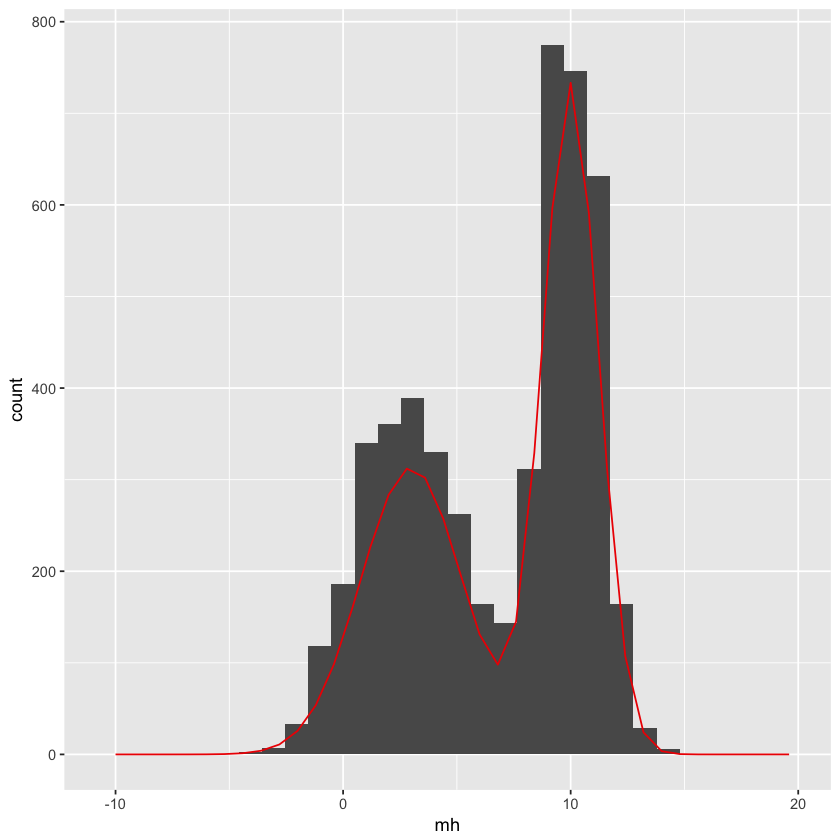

In [21]:
ggplot(mh_sampling, aes(mh)) + geom_histogram() + geom_line(aes(x = real_x, 
    y = count), data = real, colour = "red2") + scale_fill_gradient2(guide = guide_legend(reverse = TRUE))